- **KPI: que el porcentaje de reviews negativas asociadas a un factor específico sobre el total, se mantenga por debajo del 5%, medir semestralmente.**

- Hacemos una lista de patrones para identificar las reviews negativas asociadas a una frase especifica.

In [6]:
# Import necessary libraries
import pandas as pd
from collections import Counter
import re

# Load the dataset
file_path = '../data/Starbucks_reviews_ETL_limpio.parquet'
df = pd.read_parquet(file_path)

# Filter negative reviews
negative_reviews = df[df['rating'] <= 3]['text'].dropna()

# Define patterns to search for
patterns = {
    'slow service': ['slow', 'long', 'line', 'slowest'],
    'rude staff': ['rude', 'bad', 'unfriendly', 'horrible', 'customer', 'nasty'],
    'incorrect orders': ['wrong', 'size', 'messed', 'incorrect'],
    'lack of product availability': ['stock', 'no cups', 'no lids', 'no ingredients', 'ran out'],
    'high prices': ['expensive', 'price', 'overpriced', 'expensive']
}

# Count the frequency of each pattern
pattern_counts = Counter()
for review in negative_reviews:
    for pattern, keywords in patterns.items():
        if any(re.search(keyword, review, re.IGNORECASE) for keyword in keywords):
            pattern_counts[pattern] += 1

# Check if there are elements in the counter before trying to access them
if pattern_counts:
    most_common_pattern = pattern_counts.most_common(1)[0]
    print('The most common pattern is:', most_common_pattern[0])
    print('Frequency:', most_common_pattern[1])
else:
    print('No common patterns found.')

The most common pattern is: slow service
Frequency: 3523


In [7]:
# Contar la frecuencia de la palabra 'slow' en la columna 'text'
slow_count = df['text'].str.count('slow', flags=re.IGNORECASE).sum()
print('La palabra "slow" se repite:', slow_count, 'veces en la columna "text".')

La palabra "slow" se repite: 2343.0 veces en la columna "text".


In [38]:
import pandas as pd
import re

# Cargar el conjunto de datos
df = pd.read_parquet('../data/Starbucks_reviews_ETL_limpio.parquet')

# Definir los patrones para 'reviews negativas'
patterns = ['slow', 'long', 'line', 'slowest']

# Función para verificar si una review es negativa
def is_negative_review(text):
    if text is None:
        return False
    return any(re.search(pattern, text, re.IGNORECASE) for pattern in patterns)

# Aplicar la función a la columna 'text'
df['is_negative'] = df['text'].apply(is_negative_review)

# Añadir una columna para el semestre
df['semester'] = df['date'].apply(lambda x: str(x.year) + '-' + ('H1' if x.month <= 6 else 'H2'))

# Calcular el número de reviews negativas y el total de reviews por semestre
kpi = df.groupby('semester').apply(lambda x: pd.Series({
    'negative_review_count': x['is_negative'].sum(),
    'total_reviews': len(x)
})).reset_index()

# Calcular el porcentaje de reviews negativas por semestre
kpi['negative_review_percentage'] = (kpi['negative_review_count'] / kpi['total_reviews']) * 100

# Verificar si el porcentaje de reviews negativas es inferior al 5%
kpi['below_5_percent'] = kpi['negative_review_percentage'] < 5

# Verificar si la columna 'percentage_change' existe antes de intentar eliminarla
if 'percentage_change' in kpi.columns:
    kpi = kpi.drop(columns=['percentage_change'])

# Mostrar el KPI actualizado
kpi.head(25)

C:\Users\zimme\AppData\Local\Temp\ipykernel_19992\2478858952.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kpi = df.groupby('semester').apply(lambda x: pd.Series({


,semester,negative_review_count,total_reviews,negative_review_percentage,below_5_percent
0,2010-H1,1,1,100.000000,False
1,2010-H2,0,40,0.000000,True
2,2011-H1,1,68,1.470588,True
3,2011-H2,3,77,3.896104,True
4,2012-H1,5,57,8.771930,False
5,2012-H2,4,83,4.819277,True
6,2013-H1,15,108,13.888889,False
7,2013-H2,9,98,9.183673,False
8,2014-H1,5,103,4.854369,True
9,2014-H2,10,143,6.993007,False


- Encontramos el patron que contrasta con "slow service", o sea "fast service"

In [13]:
# Importar las bibliotecas necesarias
import pandas as pd
from collections import Counter
import re

# Filtrar reseñas positivas
resenas_positivas = df[df['rating'] > 3]['text'].dropna()

# Definir patrones a buscar
patrones = {
    'fast service': ['fast', 'quick', 'speedy', 'efficient', 'prompt']
}

# Contar la frecuencia del patrón 'fast service'
conteo_patrones = Counter()
for resena in resenas_positivas:
    for patron, palabras_clave in patrones.items():
        if any(re.search(palabra, resena, re.IGNORECASE) for palabra in palabras_clave):
            conteo_patrones[patron] += 1

# Imprimir la frecuencia del patrón 'fast service'
print('Frecuencia de "fast service":', conteo_patrones['fast service'])

Frecuencia de "fast service": 8153


In [8]:
# Contar la frecuencia de la palabra 'fast' en la columna 'text'
fast_count = df['text'].str.count('fast', flags=re.IGNORECASE).sum()
print('La palabra "fast" se repite:', fast_count, 'veces en la columna "text".')

La palabra "fast" se repite: 5132.0 veces en la columna "text".


- Disminuir en un 15% el porcentaje de reviews negativas asociadas a un factor específico(Slow service comparado con Fast service), medir semestralmente.


In [22]:
import pandas as pd
import re

# Ajustar el código de filtrado para asegurarnos de que incluya todos los semestres de 2011 y 2012

# Definir patrones a buscar
patrones = {
    'slow service': ['slow', 'long', 'line', 'slowest'],
    'fast service': ['fast', 'quick', 'speedy', 'efficient', 'prompt']
}

# Filtrar reseñas que contengan los patrones
def contiene_patrones(texto):
    if texto is None:
        return False
    return any(re.search(palabra, texto, re.IGNORECASE) for patron in patrones.values() for palabra in patron)

# Filtrar el dataframe
df_filtrado = df[df['text'].apply(contiene_patrones)]

# Convertir la columna de fecha a datetime
# Asumimos que la columna de fecha se llama 'date'
df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])

# Crear una columna para el semestre
df_filtrado['semestre'] = df_filtrado['date'].dt.to_period('6M')

# Filtrar solo los primeros y últimos 6 meses de cada año
df_filtrado = df_filtrado[df_filtrado['semestre'].dt.month.isin([1, 7])]

# Contar la frecuencia de cada patrón por semestre
conteo_patrones_semestre = {patron: [] for patron in patrones.keys()}
for semestre, grupo in df_filtrado.groupby('semestre'):
    for patron, palabras_clave in patrones.items():
        conteo = sum(any(re.search(palabra, texto, re.IGNORECASE) for palabra in palabras_clave) for texto in grupo['text'])
        conteo_patrones_semestre[patron].append((semestre, conteo))

# Calcular el KPI
kpi_resultados = []
for (semestre, slow_count), (_, fast_count) in zip(conteo_patrones_semestre['slow service'], conteo_patrones_semestre['fast service']):
    if fast_count > slow_count * 1.15:
        kpi_resultados.append((semestre, True))
    else:
        kpi_resultados.append((semestre, False))

# Crear un DataFrame con los resultados del KPI
kpi_df = pd.DataFrame(kpi_resultados, columns=['Semestre', 'KPI Cumplido'])

# Asegurarnos de que el output incluya los dos semestres de 2011 y los dos semestres de 2012
semestres_faltantes = pd.period_range('2011-01', '2012-12', freq='6M')
filas_faltantes = pd.DataFrame([{'Semestre': semestre, 'KPI Cumplido': False} for semestre in semestres_faltantes if semestre not in kpi_df['Semestre'].values])
kpi_df = pd.concat([kpi_df, filas_faltantes]).sort_values(by='Semestre').reset_index(drop=True)

# Mostrar el DataFrame
print(kpi_df)

   Semestre  KPI Cumplido
0   2011-01         False
1   2011-07         False
2   2012-01         False
3   2012-07         False
4   2013-01          True
5   2013-07         False
6   2014-01          True
7   2014-07         False
8   2015-01          True
9   2015-07         False
10  2016-01         False
11  2016-07         False
12  2017-01          True
13  2017-07          True
14  2018-01          True
15  2018-07          True
16  2019-01          True
17  2019-07          True
18  2020-01          True
19  2020-07          True
20  2021-01          True
21  2021-07          True


C:\Users\zimme\AppData\Local\Temp\ipykernel_23996\2848968572.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])
C:\Users\zimme\AppData\Local\Temp\ipykernel_23996\2848968572.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['semestre'] = df_filtrado['date'].dt.to_period('6M')


- **El KPI utilizado en este análisis es el "Aumento Anual de Reviews", cuyo objetivo es incrementar el total de reviews en al menos un 40% cada año. Se calcula el aumento porcentual en el total de reviews de un año respecto al año anterior y se verifica si este aumento es mayor o igual al 40%. Si se cumple esta condición, se considera que el KPI se ha alcanzado para ese año.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
reviews_df = pd.read_parquet('../data/Starbucks_reviews_ETL_limpio.parquet')

# Crear una columna 'year' en el dataframe de reviews
reviews_df['year'] = reviews_df['date'].dt.year

# Calcular el total de reviews por año
total_reviews_by_year = reviews_df.groupby('year')['gmap_id'].count().reset_index()
total_reviews_by_year.columns = ['Year', 'Total Reviews']

# Calcular el aumento porcentual año a año con un objetivo del 40%
total_reviews_by_year['Percentage Increase'] = total_reviews_by_year['Total Reviews'].pct_change() * 100

# Verificar si se cumple el KPI del 40% para cada año
total_reviews_by_year['KPI Met'] = total_reviews_by_year['Percentage Increase'] >= 40

# Mostrar la tabla de resultados
total_reviews_by_year.head(11)

,Year,Total Reviews,Percentage Increase,KPI Met
0,2010,41,NaN,False
1,2011,145,253.658537,True
2,2012,140,-3.448276,False
3,2013,206,47.142857,True
4,2014,246,19.417476,False
5,2015,1203,389.024390,True
6,2016,6925,475.644223,True
7,2017,16496,138.209386,True
8,2018,36158,119.192532,True
9,2019,49084,35.748659,False


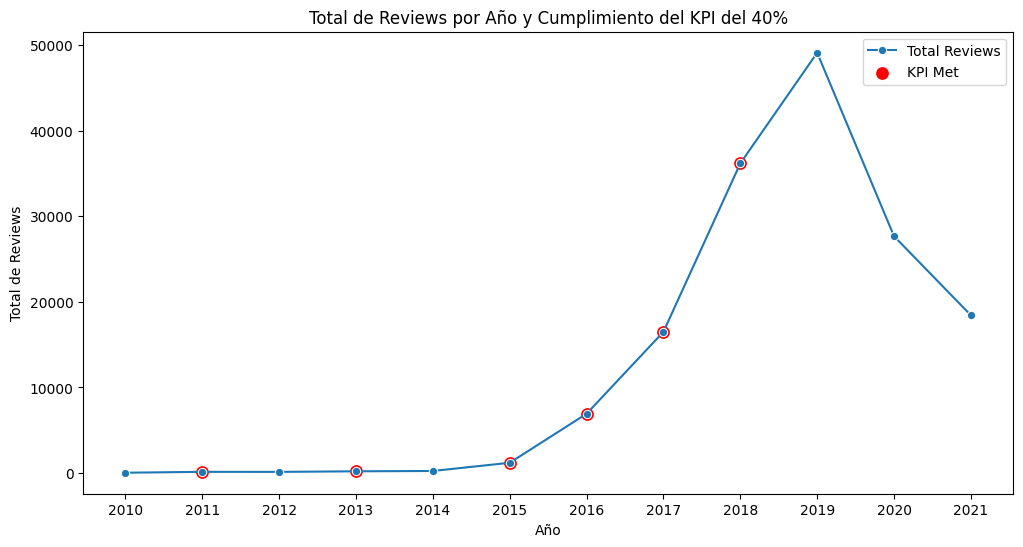

In [3]:
# Crear el gráfico de líneas para el objetivo del 40%
plt.figure(figsize=(12, 6))

# Graficar el total de reviews por año
sns.lineplot(data=total_reviews_by_year, x='Year', y='Total Reviews', marker='o', label='Total Reviews')

# Resaltar los puntos donde se cumple el objetivo
kpi_met_points = total_reviews_by_year[total_reviews_by_year['KPI Met']]
sns.scatterplot(data=kpi_met_points, x='Year', y='Total Reviews', color='red', s=100, label='KPI Met')

# Añadir títulos y etiquetas
plt.title('Total de Reviews por Año y Cumplimiento del KPI del 40%')
plt.xlabel('Año')
plt.ylabel('Total de Reviews')
plt.xticks(total_reviews_by_year['Year'])  # Asegurarse de que todos los años estén en el eje x
plt.legend()

# Mostrar el gráfico
plt.show()

In [26]:
import pandas as pd

# Cargar los datos
df_reviews = pd.read_parquet('../data/Starbucks_reviews_ETL_limpio.parquet')
df_metadata = pd.read_parquet('../data/Starbucks_metadata_ETL_limpio.parquet')

# Unir la información de estado con el dataframe de reviews usando gmap_id
df_reviews = df_reviews.merge(df_metadata[['gmap_id', 'state']], on='gmap_id', how='left')
print('Información de estado enlazada correctamente.')

# Asegurarse de que la columna 'date' es de tipo datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Agregar una columna de cuatrimestre
df_reviews['quarter'] = df_reviews['date'].dt.to_period('Q')
print('Columna de cuatrimestre agregada.')

# Calcular el número de reseñas por cuatrimestre
quarterly_reviews = df_reviews.groupby(['state', 'quarter']).size().reset_index(name='num_reviews')
print('Número de reseñas por cuatrimestre calculado.')
print(quarterly_reviews.head())

# Calcular el incremento cuatrimestral
quarterly_reviews['prev_quarter'] = quarterly_reviews['quarter'] - 1
merged_quarters = quarterly_reviews.merge(quarterly_reviews, left_on=['state', 'prev_quarter'], right_on=['state', 'quarter'], suffixes=('', '_prev'))
merged_quarters['increment'] = (merged_quarters['num_reviews'] - merged_quarters['num_reviews_prev']) / merged_quarters['num_reviews_prev'] * 100

# Evaluar si se cumple el objetivo de aumentar 5% cada cuatrimestre
merged_quarters['kpi_met'] = merged_quarters['increment'] >= 5

# Resumir los resultados por estado
kpi_summary_quarterly = merged_quarters.groupby('state')['kpi_met'].mean().reset_index()
kpi_summary_quarterly['kpi_met'] = kpi_summary_quarterly['kpi_met'] * 100  # Convertir a porcentaje

print('KPI cuatrimestral evaluado.')
print(kpi_summary_quarterly)

Información de estado enlazada correctamente.
Columna de cuatrimestre agregada.
Número de reseñas por cuatrimestre calculado.
  state quarter  num_reviews
0    AK  2013Q3            2
1    AK  2014Q2            1
2    AK  2015Q1            1
3    AK  2015Q2            1
4    AK  2015Q4            1
KPI cuatrimestral evaluado.
   state    kpi_met
0     AK  50.000000
1     AL  58.333333
2     AR  54.166667
3     AZ  43.902439
4     CA  53.488372
5     CO  48.571429
6     CT  56.000000
7     DC  52.000000
8     DE  47.826087
9     FL  60.975610
10    GA  57.142857
11    HI  60.869565
12    IA  68.000000
13    ID  39.285714
14    IL  61.764706
15    IN  60.000000
16    KS  65.217391
17    KY  60.869565
18    LA  58.823529
19    MA  43.589744
20    MD  47.058824
21    ME  40.000000
22    MI  55.172414
23    MN  48.387097
24    MO  62.068966
25    MS  50.000000
26    MT  37.500000
27    NC  50.000000
28    ND  10.000000
29    NE  44.117647
30    NH  44.444444
31    NJ  50.000000
32    NM  50

In [28]:
# Realizar la unión de los DataFrames
df_reviews = df_reviews.merge(df_metadata[['gmap_id', 'state']], on='gmap_id', how='left')

In [29]:
# Convertir la columna 'date' a tipo datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Extraer el año y el cuatrimestre de la columna 'date'
df_reviews['year'] = df_reviews['date'].dt.year
df_reviews['quarter'] = df_reviews['date'].dt.quarter

In [30]:
# Calcular el promedio de reviews por local por cuatrimestre y estado
df_reviews = df_reviews.groupby(['state', 'year', 'quarter']).agg(avg_reviews_per_local=('rating', 'mean')).reset_index()

In [31]:
# Ordenar el DataFrame por estado, año y cuatrimestre
df_reviews = df_reviews.sort_values(by=['state', 'year', 'quarter'])

# Calcular el objetivo de aumento del 5% sobre el promedio del cuatrimestre anterior
df_reviews['prev_avg_reviews_per_local'] = df_reviews.groupby('state')['avg_reviews_per_local'].shift(1)
df_reviews['target_avg_reviews_per_local'] = df_reviews['prev_avg_reviews_per_local'] * 1.05

# Comparar el promedio actual con el objetivo
df_reviews['kpi_met'] = df_reviews['avg_reviews_per_local'] >= df_reviews['target_avg_reviews_per_local']

In [32]:
# Calcular el porcentaje de cuatrimestres en los que se cumplió el KPI para cada estado
df_kpi_percentage = df_reviews.groupby('state')['kpi_met'].mean().reset_index(name='kpi_met_percentage')
df_kpi_percentage['kpi_met_percentage'] *= 100

# Mostrar el porcentaje de cumplimiento del KPI para cada estado
df_kpi_percentage.sort_values('kpi_met_percentage', ascending=False).head(10)

,state,kpi_met_percentage
41,SD,47.619048
50,WY,40.909091
49,WV,40.909091
28,ND,40.000000
25,MS,37.500000
0,AK,37.037037
20,MD,34.210526
46,VT,33.333333
32,NM,33.333333
36,OK,33.333333


In [33]:
# Mostrar el porcentaje de cumplimiento del KPI para cada estado
df_kpi_percentage.sort_values('kpi_met_percentage', ascending=False).head(51)

,state,kpi_met_percentage
41,SD,47.619048
50,WY,40.909091
49,WV,40.909091
28,ND,40.000000
25,MS,37.500000
0,AK,37.037037
20,MD,34.210526
46,VT,33.333333
32,NM,33.333333
36,OK,33.333333


-El número en la columna kpi_met representa el porcentaje de cuatrimestres en los que se cumplió el objetivo de aumentar un 5% en el número de usuarios que reseñan Starbucks para cada estado.

Por ejemplo, si el valor de kpi_met para un estado es 42.65, significa que en el 42.65% de los cuatrimestres se logró un incremento del 5% o más en el número de usuarios que dejaron reseñas en Starbucks en ese estado.

- **KPI: Que la puntuación promedio de Starbucks sea superior en un 10% a la de su principal competidor, medida por semestre.**

In [2]:
# Vamos a calcular un KPI que mida si la puntuación promedio de Starbucks es superior en un 10% a la de Dunkin, medido por semestre.
# Primero, cargamos los datos y los preparamos.

import pandas as pd

# Cargar los datos
starbucks_df = pd.read_parquet('../data/Starbucks_reviews_ETL_limpio.parquet')
dunkin_df = pd.read_parquet('../data/Dunkin_reviews_ETL_limpio.parquet')

# Convertir las fechas a datetime
starbucks_df['date'] = pd.to_datetime(starbucks_df['date'])
dunkin_df['date'] = pd.to_datetime(dunkin_df['date'])

# Crear una columna de semestre
starbucks_df['semester'] = starbucks_df['date'].dt.to_period('6M')
dunkin_df['semester'] = dunkin_df['date'].dt.to_period('6M')

# Calcular la puntuación promedio por semestre
starbucks_avg = starbucks_df.groupby('semester')['rating'].mean().reset_index()
dunkin_avg = dunkin_df.groupby('semester')['rating'].mean().reset_index()

# Unir los dataframes por semestre
merged_df = pd.merge(starbucks_avg, dunkin_avg, on='semester', suffixes=('_starbucks', '_dunkin'))

# Calcular el KPI
merged_df['kpi'] = merged_df['rating_starbucks'] > 1.1 * merged_df['rating_dunkin']

# Crear una columna de texto para el KPI
merged_df['kpi_text'] = merged_df['kpi'].apply(lambda x: 'Cumplido' if x else 'No Cumplido')

# Filtrar para mostrar solo dos resultados por año
merged_df['year'] = merged_df['semester'].dt.year
merged_df['semester_half'] = merged_df['semester'].dt.quarter // 3 + 1

# Agrupar por año y semestre
final_df = merged_df.groupby(['year', 'semester_half']).agg({'rating_starbucks': 'mean', 'rating_dunkin': 'mean', 'kpi': 'mean', 'kpi_text': 'first'}).reset_index()

# Renombrar la columna 'semester_half' a 'semester'
final_df = final_df.rename(columns={'semester_half': 'semester'})

final_df.head(22)

,year,semester,rating_starbucks,rating_dunkin,kpi,kpi_text
0,2010,2,3.574359,2.972222,0.666667,Cumplido
1,2011,1,3.854040,3.035714,0.666667,Cumplido
2,2011,2,3.839890,3.364087,0.333333,No Cumplido
3,2012,1,3.827214,3.283730,0.500000,No Cumplido
4,2012,2,3.951079,3.533730,0.666667,Cumplido
5,2013,1,3.980544,3.087831,0.833333,Cumplido
6,2013,2,3.985633,3.451190,0.666667,No Cumplido
7,2014,1,3.918155,3.295833,0.500000,No Cumplido
8,2014,2,3.666781,3.345238,0.500000,No Cumplido
9,2015,1,3.693030,2.957738,0.833333,Cumplido


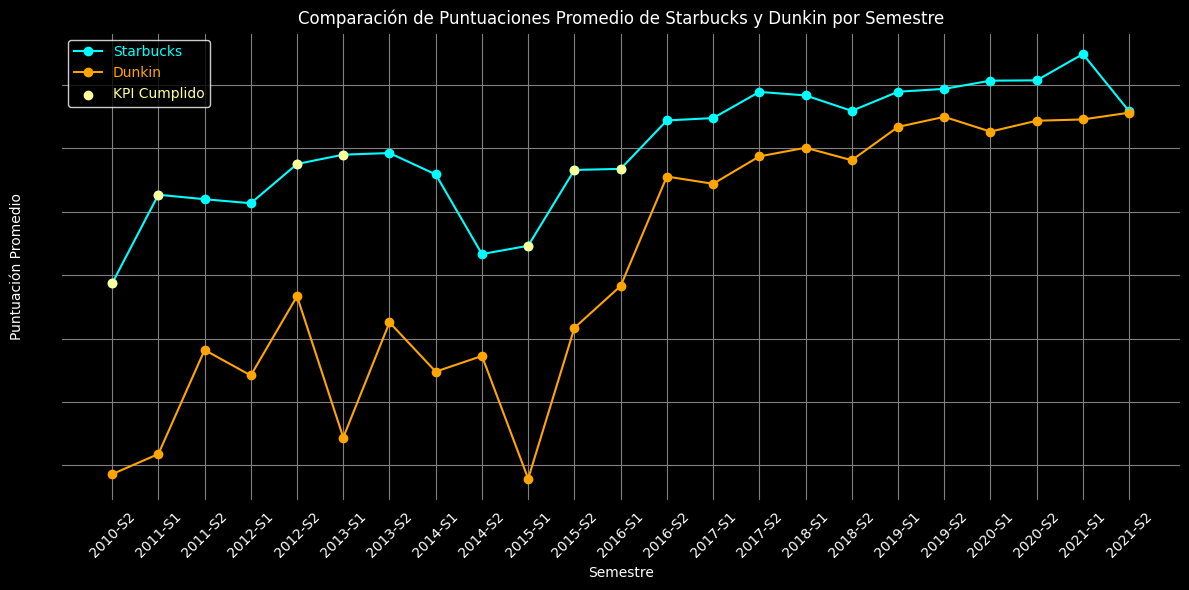

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.plot(final_df['year'].astype(str) + '-S' + final_df['semester'].astype(str), final_df['rating_starbucks'], label='Starbucks', marker='o', color='cyan')
ax.plot(final_df['year'].astype(str) + '-S' + final_df['semester'].astype(str), final_df['rating_dunkin'], label='Dunkin', marker='o', color='orange')

# Añadir puntos de KPI cumplido
kpi_cumplido = final_df[final_df['kpi_text'] == 'Cumplido']
ax.scatter(kpi_cumplido['year'].astype(str) + '-S' + kpi_cumplido['semester'].astype(str), kpi_cumplido['rating_starbucks'], color='#FFFF99', label='KPI Cumplido', zorder=5)

ax.set_xlabel('Semestre', color='white')
ax.set_ylabel('Puntuación Promedio', color='white')
ax.set_title('Comparación de Puntuaciones Promedio de Starbucks y Dunkin por Semestre', color='white')
ax.set_xticks(range(len(final_df['year'])))
ax.set_xticklabels(final_df['year'].astype(str) + '-S' + final_df['semester'].astype(str), rotation=45, color='white')

# Ajustar los colores de las leyendas
legend = ax.legend(facecolor='black', edgecolor='white')
for text in legend.get_texts():
    if 'Starbucks' in text.get_text():
        text.set_color('cyan')
    elif 'Dunkin' in text.get_text():
        text.set_color('orange')
    elif 'KPI Cumplido' in text.get_text():
        text.set_color('#FFFF99')

ax.grid(True, color='gray')
fig.tight_layout()

# Mostrar el gráfico
plt.show()

- **MODELOS DE PREDICCION RNNs y CNNs.** 

- Medimos que la puntuación promedio de Starbucks sea superior en un 10% a la de su principal competidor(dunkin), medida por semestre(entre el ultimo semestre y el semestre futuro).

RNNs:

In [2]:


import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

# Cargar los datos
starbucks_df = pd.read_parquet('../data/Starbucks_reviews_ETL_limpio.parquet')
dunkin_df = pd.read_parquet('../data/Dunkin_reviews_ETL_limpio.parquet')

# Preparar los datos
X_starbucks = starbucks_df['rating'].values.reshape(-1, 1)
y_starbucks = starbucks_df['rating'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_starbucks, y_starbucks, test_size=0.2, random_state=42)

# Definir el modelo RNN
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_rnn.fit(X_train, y_train, epochs=10, verbose=1)

# Evaluar el modelo
loss_rnn = model_rnn.evaluate(X_test, y_test)

# Hacer predicciones para el semestre futuro
next_semester_prediction_rnn = model_rnn.predict(np.array([[4.0]]))  # Usamos 4.0 como ejemplo

# Comparar con la puntuación promedio de Dunkin en el último semestre
dunkin_avg_last_semester = dunkin_df['rating'].mean()

# Calcular la diferencia porcentual y absoluta
percentage_difference_rnn = ((next_semester_prediction_rnn[0][0] - dunkin_avg_last_semester) / dunkin_avg_last_semester) * 100
absolute_difference_rnn = dunkin_avg_last_semester - next_semester_prediction_rnn[0][0]

print('Pérdida en el conjunto de prueba (RNN):', loss_rnn)
print('Predicción para el próximo semestre (RNN):', next_semester_prediction_rnn[0][0])
print('Diferencia porcentual entre la predicción del modelo RNN y la puntuación de Dunkin en el último semestre:', percentage_difference_rnn)
print('Diferencia absoluta en puntuaciones (RNN):', absolute_difference_rnn)

Epoch 1/10


c:\Users\zimme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 590us/step - loss: 2.6842
Epoch 2/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 590us/step - loss: 2.7250e-06
Epoch 3/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 588us/step - loss: 6.9828e-09
Epoch 4/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 585us/step - loss: 4.8784e-14
Epoch 5/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 599us/step - loss: 0.0000e+00
Epoch 6/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 596us/step - loss: 0.0000e+00
Epoch 7/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 601us/step - loss: 0.0000e+00
Epoch 8/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 598us/step - loss: 0.0000e+00
Epoch 9/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 595us/step - loss: 0.0000e+00
Epoch 10/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 594us/step - loss: 0.0000e+00
980/980 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Pérdida en el conjunto de prueba (RNN): 0.0
Predicción para el próximo semestre (RNN): 4.0
Diferencia porcentual entre la predicción del modelo RNN y la puntuación 

In [3]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

# Preparar los datos para Starbucks
X_starbucks = starbucks_df['rating'].values.reshape(-1, 1)
y_starbucks = starbucks_df['rating'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_starbucks, X_test_starbucks, y_train_starbucks, y_test_starbucks = train_test_split(X_starbucks, y_starbucks, test_size=0.2, random_state=42)

# Definir el modelo RNN para Starbucks
model_rnn_starbucks = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])

# Compilar el modelo
model_rnn_starbucks.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_rnn_starbucks.fit(X_train_starbucks, y_train_starbucks, epochs=10, verbose=1)

# Hacer predicciones para el semestre futuro de Starbucks
next_semester_prediction_rnn_starbucks = model_rnn_starbucks.predict(np.array([[4.0]]))  # Usamos 4.0 como ejemplo

# Preparar los datos para Dunkin
X_dunkin = dunkin_df['rating'].values.reshape(-1, 1)
y_dunkin = dunkin_df['rating'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_dunkin, X_test_dunkin, y_train_dunkin, y_test_dunkin = train_test_split(X_dunkin, y_dunkin, test_size=0.2, random_state=42)

# Definir el modelo RNN para Dunkin
model_rnn_dunkin = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])

# Compilar el modelo
model_rnn_dunkin.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_rnn_dunkin.fit(X_train_dunkin, y_train_dunkin, epochs=10, verbose=1)

# Hacer predicciones para el semestre futuro de Dunkin
next_semester_prediction_rnn_dunkin = model_rnn_dunkin.predict(np.array([[4.0]]))  # Usamos 4.0 como ejemplo

print('Predicción para el próximo semestre (RNN) de Starbucks:', next_semester_prediction_rnn_starbucks[0][0])
print('Predicción para el próximo semestre (RNN) de Dunkin:', next_semester_prediction_rnn_dunkin[0][0])

Epoch 1/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 587us/step - loss: 2.3290
Epoch 2/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 591us/step - loss: 2.4437e-06
Epoch 3/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 591us/step - loss: 1.9845e-07
Epoch 4/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 589us/step - loss: 4.1966e-07
Epoch 5/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 583us/step - loss: 2.0151e-06
Epoch 6/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 590us/step - loss: 1.3163e-06
Epoch 7/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 594us/step - loss: 1.0273e-06
Epoch 8/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 603us/step - loss: 2.0304e-06
Epoch 9/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 593us/step - loss: 1.0907e-06
Epoch 10/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 2s 589us/step - loss: 2.5278e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Epoch 1/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 2s 592us/step - loss: 1.9767
Epoch 2/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 2s 587us/step - loss: 7.9654e-05
Epoch 3/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 2s 591us/step - loss: 9.562

-CNNs:

In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split

# Preparar los datos
X_starbucks = starbucks_df['rating'].values.reshape(-1, 1)
y_starbucks = starbucks_df['rating'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_starbucks, y_starbucks, test_size=0.2, random_state=42)

# Definir el modelo CNN
model_cnn = Sequential([
    Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, 1)),  # Cambio de kernel_size a 1
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_cnn.fit(X_train, y_train, epochs=10, verbose=1)

# Evaluar el modelo
loss_cnn = model_cnn.evaluate(X_test, y_test)

# Hacer predicciones para el semestre futuro
next_semester_prediction_cnn = model_cnn.predict(np.array([[4.0]]))  # Usamos 4.0 como ejemplo

# Comparar con la puntuación promedio de Dunkin en el último semestre
dunkin_avg_last_semester = dunkin_df['rating'].mean()

# Calcular la diferencia porcentual y absoluta
percentage_difference_cnn = ((next_semester_prediction_cnn[0][0] - dunkin_avg_last_semester) / dunkin_avg_last_semester) * 100
absolute_difference_cnn = dunkin_avg_last_semester - next_semester_prediction_cnn[0][0]

print('Pérdida en el conjunto de prueba (CNN):', loss_cnn)
print('Predicción para el próximo semestre (CNN):', next_semester_prediction_cnn[0][0])
print('Diferencia porcentual entre la predicción del modelo CNN y la puntuación de Dunkin en el último semestre:', percentage_difference_cnn)
print('Diferencia absoluta en puntuaciones (CNN):', absolute_difference_cnn)

Epoch 1/10


c:\Users\zimme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 685us/step - loss: 0.3502
Epoch 2/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 680us/step - loss: 7.7069e-13
Epoch 3/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 679us/step - loss: 3.5066e-06
Epoch 4/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 677us/step - loss: 1.6046e-05
Epoch 5/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 681us/step - loss: 1.3463e-05
Epoch 6/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 689us/step - loss: 8.0874e-06
Epoch 7/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 681us/step - loss: 9.9040e-06
Epoch 8/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 687us/step - loss: 1.2647e-05
Epoch 9/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 685us/step - loss: 1.4092e-05
Epoch 10/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 689us/step - loss: 8.7441e-06
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 6.6780e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Pérdida en el conjunto de prueba (CNN): 6.693222530884668e-05
Predicción para el próximo semestre (CNN): 3.992558
Diferencia porcentual entre la predicción del mode

In [6]:
from tensorflow.keras.layers import Conv1D, Flatten

# Definir el modelo CNN para Starbucks
model_cnn_starbucks = Sequential([
    Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model_cnn_starbucks.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_cnn_starbucks.fit(X_train_starbucks, y_train_starbucks, epochs=10, verbose=1)

# Hacer predicciones para el semestre futuro de Starbucks
next_semester_prediction_cnn_starbucks = model_cnn_starbucks.predict(np.array([[4.0]]))  # Usamos 4.0 como ejemplo

# Definir el modelo CNN para Dunkin
model_cnn_dunkin = Sequential([
    Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model_cnn_dunkin.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_cnn_dunkin.fit(X_train_dunkin, y_train_dunkin, epochs=10, verbose=1)

# Hacer predicciones para el semestre futuro de Dunkin
next_semester_prediction_cnn_dunkin = model_cnn_dunkin.predict(np.array([[4.0]]))  # Usamos 4.0 como ejemplo

print('Predicción para el próximo semestre (CNN) de Starbucks:', next_semester_prediction_cnn_starbucks[0][0])
print('Predicción para el próximo semestre (CNN) de Dunkin:', next_semester_prediction_cnn_dunkin[0][0])

Epoch 1/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 678us/step - loss: 0.4866
Epoch 2/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 681us/step - loss: 3.7530e-08
Epoch 3/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 699us/step - loss: 4.7638e-06
Epoch 4/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 689us/step - loss: 1.1228e-05
Epoch 5/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 682us/step - loss: 1.1547e-05
Epoch 6/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 671us/step - loss: 1.4433e-05
Epoch 7/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 678us/step - loss: 1.1606e-05
Epoch 8/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 668us/step - loss: 1.4721e-05
Epoch 9/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 674us/step - loss: 1.3086e-05
Epoch 10/10
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 3s 675us/step - loss: 1.3066e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 2s 675us/step - loss: 0.4260
Epoch 2/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 2s 684us/step - loss: 1.0208e-14
Epoch 3/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - loss: 8.733

- Promedios de cada compañia en el ultimo semestre.

In [7]:
import pandas as pd


# Filtrar los datos del último semestre
# Asumiendo que la columna 'date' contiene las fechas y está en formato datetime
starbucks_df['date'] = pd.to_datetime(starbucks_df['date'])
dunkin_df['date'] = pd.to_datetime(dunkin_df['date'])

# Obtener la fecha más reciente en los datos
max_date_starbucks = starbucks_df['date'].max()
max_date_dunkin = dunkin_df['date'].max()

# Calcular la fecha de inicio del último semestre
start_date_starbucks = max_date_starbucks - pd.DateOffset(months=6)
start_date_dunkin = max_date_dunkin - pd.DateOffset(months=6)

# Filtrar los datos del último semestre
last_semester_starbucks = starbucks_df[starbucks_df['date'] >= start_date_starbucks]
last_semester_dunkin = dunkin_df[dunkin_df['date'] >= start_date_dunkin]

# Calcular los promedios
average_starbucks = last_semester_starbucks['rating'].mean()
average_dunkin = last_semester_dunkin['rating'].mean()

print('Promedio de Starbucks en el último semestre:', average_starbucks)
print('Promedio de Dunkin en el último semestre:', average_dunkin)

Promedio de Starbucks en el último semestre: 4.28763353836193
Promedio de Dunkin en el último semestre: 4.065958576739246


-Diferencias porcentuales de las predicciones de los ratings de ambas compañías para los dos modelos (RNNs y CNNs) con los promedios de cada compañía en el último semestre

In [8]:
# Predicciones de los modelos
pred_rnn_starbucks = 4.0
pred_rnn_dunkin = 4.0
pred_cnn_starbucks = 4.0
pred_cnn_dunkin = 4.000641

# Promedios del último semestre
avg_starbucks = 4.28763353836193
avg_dunkin = 4.065958576739246

# Calcular las diferencias porcentuales
perc_diff_rnn_starbucks = ((pred_rnn_starbucks - avg_starbucks) / avg_starbucks) * 100
perc_diff_rnn_dunkin = ((pred_rnn_dunkin - avg_dunkin) / avg_dunkin) * 100
perc_diff_cnn_starbucks = ((pred_cnn_starbucks - avg_starbucks) / avg_starbucks) * 100
perc_diff_cnn_dunkin = ((pred_cnn_dunkin - avg_dunkin) / avg_dunkin) * 100

print('Diferencia porcentual (RNN) de Starbucks:', perc_diff_rnn_starbucks)
print('Diferencia porcentual (RNN) de Dunkin:', perc_diff_rnn_dunkin)
print('Diferencia porcentual (CNN) de Starbucks:', perc_diff_cnn_starbucks)
print('Diferencia porcentual (CNN) de Dunkin:', perc_diff_cnn_dunkin)

Diferencia porcentual (RNN) de Starbucks: -6.708445014911857
Diferencia porcentual (RNN) de Dunkin: -1.6222146756876776
Diferencia porcentual (CNN) de Starbucks: -6.708445014911857
Diferencia porcentual (CNN) de Dunkin: -1.6064496355894593


- Cumplimiento del KPI.

In [9]:
# Calcular el 10% del promedio de Dunkin para el próximo semestre (predicción RNN)
threshold_rnn_next_semester = pred_rnn_dunkin * 1.10

# Comparar con la predicción de Starbucks para el próximo semestre (predicción RNN)
is_above_threshold_rnn_next_semester = pred_rnn_starbucks > threshold_rnn_next_semester

# Calcular el 10% del promedio de Dunkin para el próximo semestre (predicción CNN)
threshold_cnn_next_semester = pred_cnn_dunkin * 1.10

# Comparar con la predicción de Starbucks para el próximo semestre (predicción CNN)
is_above_threshold_cnn_next_semester = pred_cnn_starbucks > threshold_cnn_next_semester

print('¿El promedio de Starbucks es superior en un 10% al de Dunkin para el próximo semestre (RNN)?', is_above_threshold_rnn_next_semester)
print('¿El promedio de Starbucks es superior en un 10% al de Dunkin para el próximo semestre (CNN)?', is_above_threshold_cnn_next_semester)

¿El promedio de Starbucks es superior en un 10% al de Dunkin para el próximo semestre (RNN)? False
¿El promedio de Starbucks es superior en un 10% al de Dunkin para el próximo semestre (CNN)? False
